In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### We can import the data set in another way via a downloaded csv file in the same Dir as this Jupyter kernel (program file)
### The dataframe name is now df
df = pd.read_csv('california_housing.frame.csv')

### There is an aberration in the large spikes of up to 1200 occupants per household in the original data set. 
### These could be incorrectly notated. We delete 37 such records with AveOccup > 10
df = df[~(df['AveOccup'] >= 10.0)] 

df=df.iloc[:,1:10]

In [3]:
df.head()
### This returns the first 5 rows of the dataframe df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
np.shape(df)
### This returns the dimension of the tabular dataframe, i.e. 20640 rows of data and 9 columns

(20603, 9)

In [5]:
# Let's summarize the data to see the distribution of data
print(df.describe())
### The behaviour of describe() is different with series of strings. giving count of values, top and freq of occurrence

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20603.000000  20603.000000  20603.000000  20603.000000  20603.000000   
mean       3.870548     28.637092      5.428533      1.096540   1423.339368   
std        1.897012     12.580805      2.471073      0.473866   1128.241516   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.564350     18.000000      4.440829      1.006135    787.000000   
50%        3.534900     29.000000      5.229682      1.048749   1166.000000   
75%        4.743850     37.000000      6.052108      1.099418   1724.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20603.000000  20603.000000  20603.000000  20603.000000  
mean       2.918517     35.631012   -119.569189      2.069010  
std        0.765234      2.135875      2.003460      1.153654  
min        0.692308     32.54000

In [6]:
df.isnull().sum()  
### this is to check if there is any missing data in the index and other columns -- none or '0'

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20603 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20603 non-null  float64
 1   HouseAge     20603 non-null  float64
 2   AveRooms     20603 non-null  float64
 3   AveBedrms    20603 non-null  float64
 4   Population   20603 non-null  float64
 5   AveOccup     20603 non-null  float64
 6   Latitude     20603 non-null  float64
 7   Longitude    20603 non-null  float64
 8   MedHouseVal  20603 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


Data descriptions. sklearn download. 1990 US Census. 20640 samples (sample units) each of which is a residential block in California. \
Target: MedHouseVal -- median house value in block, in USD100,000\
Features:\
MedInc --median of households in block, in $10,000\
HouseAge -- in years\
AveRooms -- average no. of rooms (all 'rooms') per household in block\
AveBedrms -- average no. of bedrooms per household in block\
Population -- total no. of occupants in block\
AveOccup -- average no. of occupants per household in block\
Longitudes -- smaller implies closer to sea

In [8]:
### MedHouseVal is censored at 5, i.e. numbers above 5 are reported as 5. This number is therefore inaccurate. Remove these.
df = df[~(df['MedHouseVal'] >= 5.0)]  
print(np.shape(df)) 
### note that 992 rows with MedHouseVal >= 5 are deleted

(19615, 9)


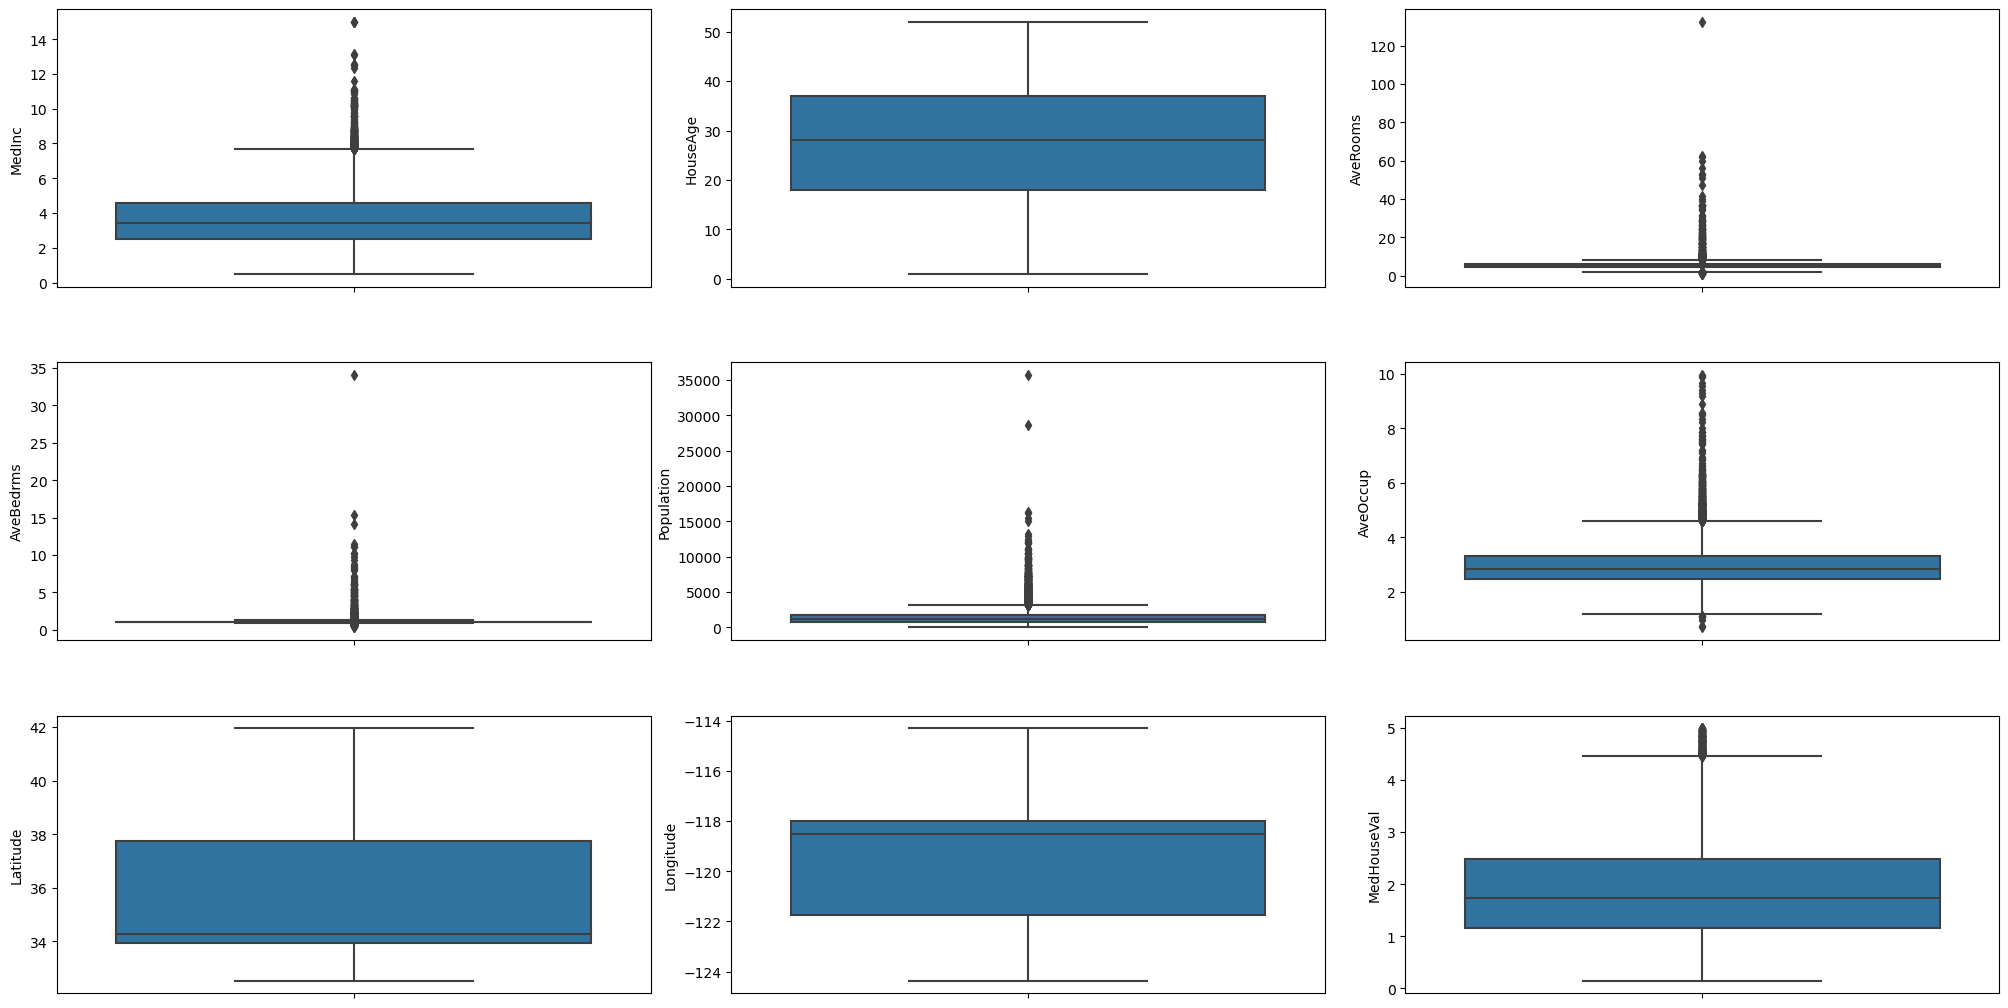

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():               
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
### In the boxplot, centerline is mean, upper and lower box edges are the 75th and 25th percentiles. 
### Whiskers connect to "max" [75% + 1.5* interquartile range IQR] and "min" [25% - 1.5* IQR] (shorter horizontal lines)
### Outliers are shown as dots outside the whiskers. 
### See also https://seaborn.pydata.org/generated/seaborn.boxplot.html

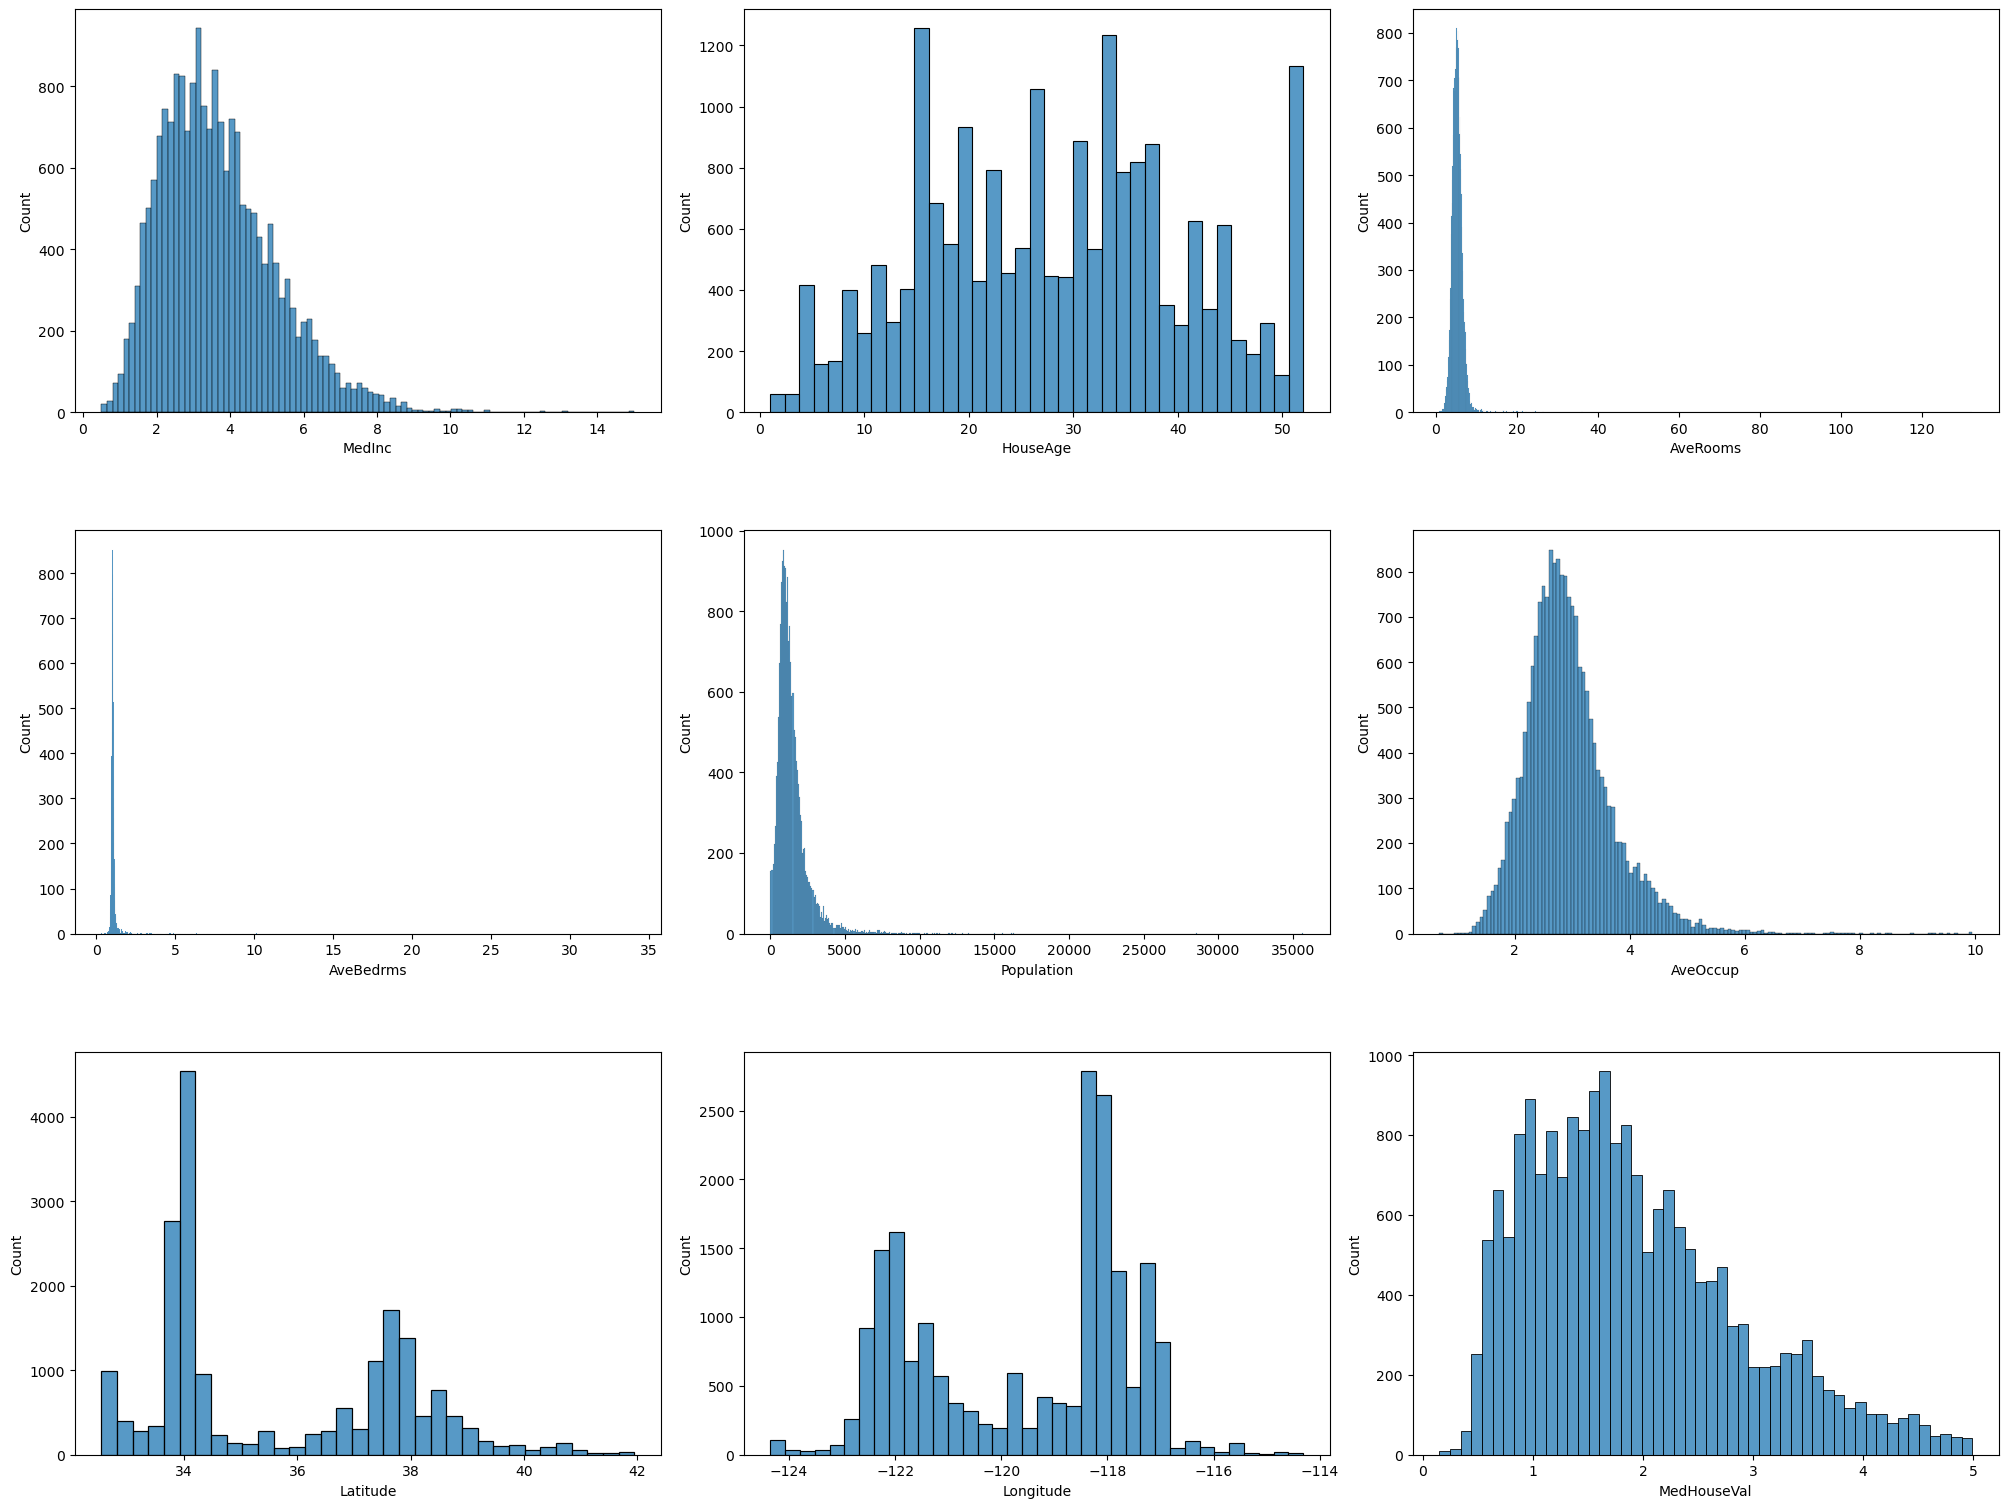

In [10]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in df.items():
   sns.histplot(v, ax=axs[index])
   index += 1 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
### uses seaborn

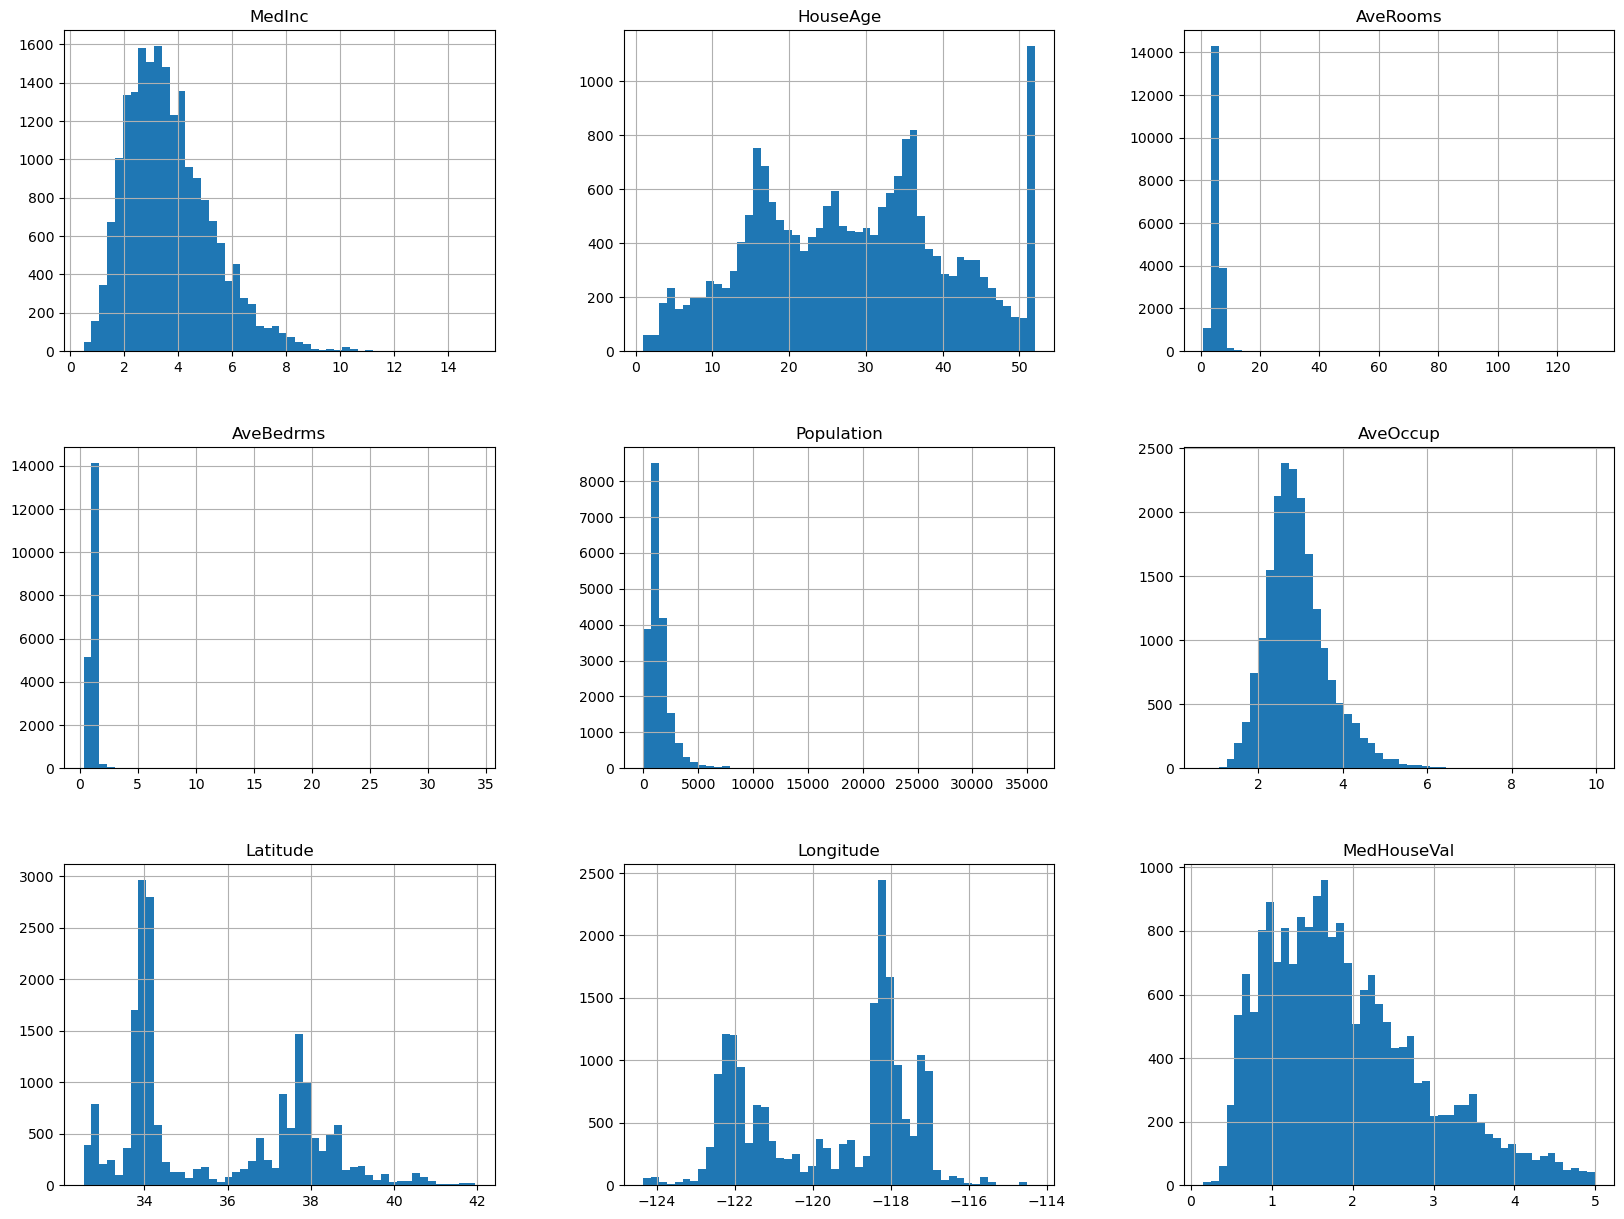

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig('California_housing_histogram_plots')
plt.show()
### compare matplotlib histogram

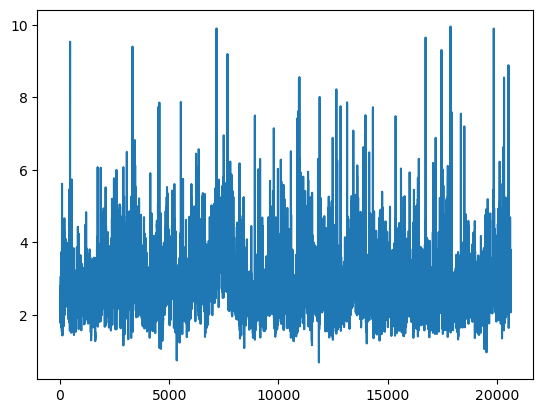

In [12]:
df['AveOccup'].plot()
plt.show()

<AxesSubplot:>

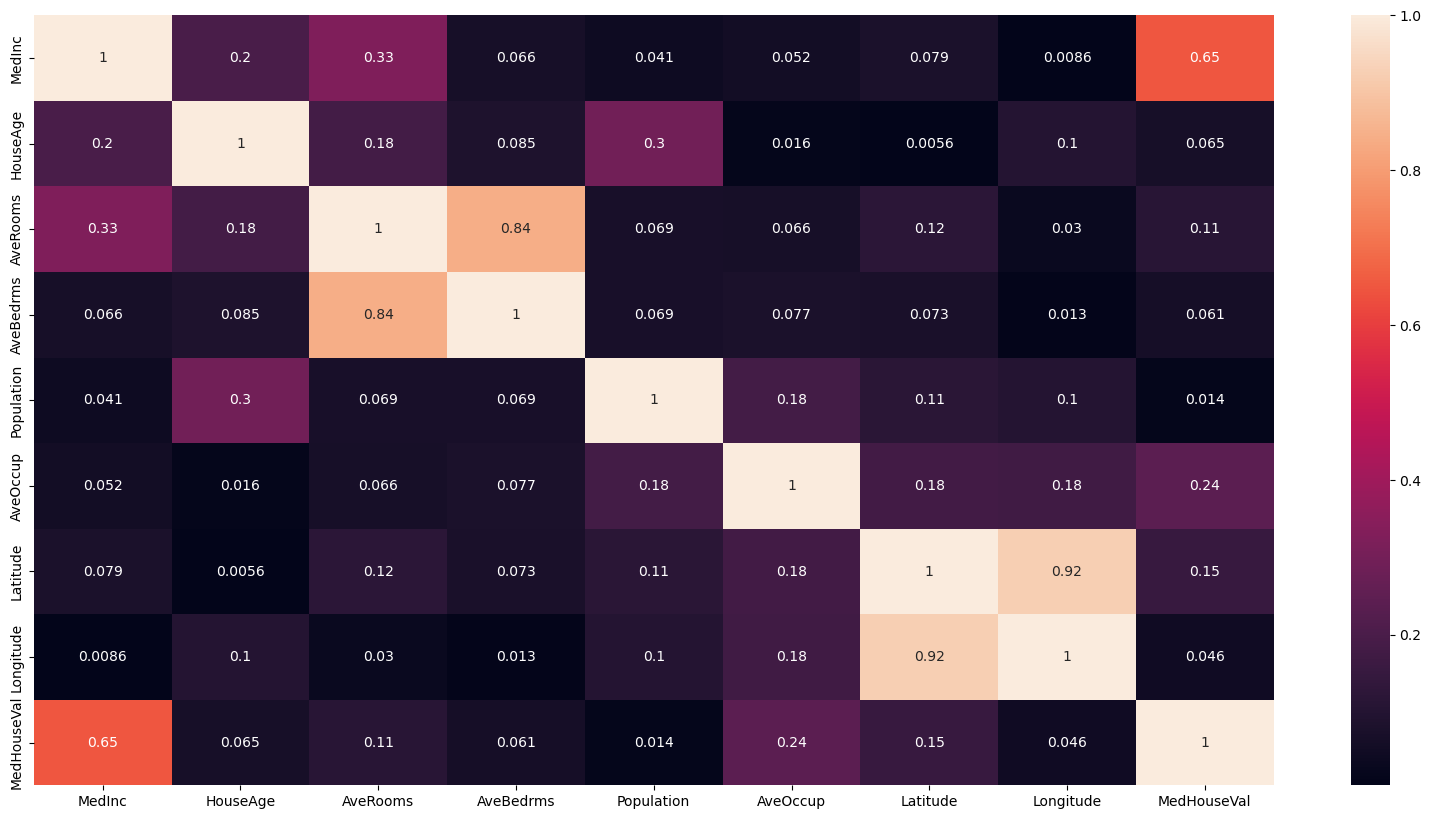

In [13]:
### pairwise correlation on the features including medv
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)
### In heat map, clearly tax and rad are highly correlated
### For more options - see https://seaborn.pydata.org/generated/seaborn.heatmap.html

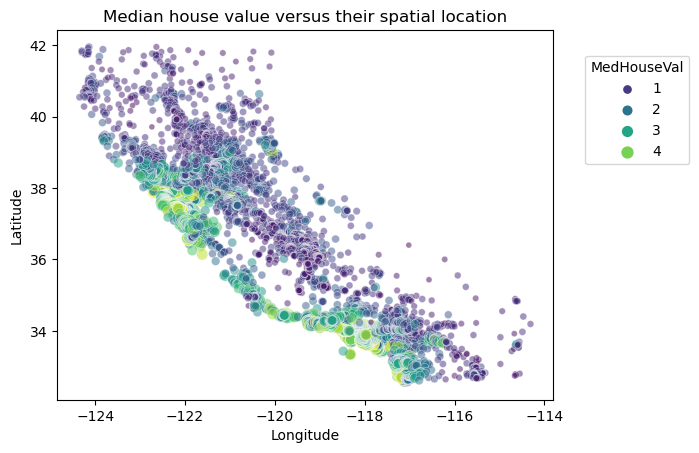

In [14]:
import seaborn as sns
sns.scatterplot(data=df, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",  ###size is grouping variable, hue is order of proecessing
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value versus their spatial location")

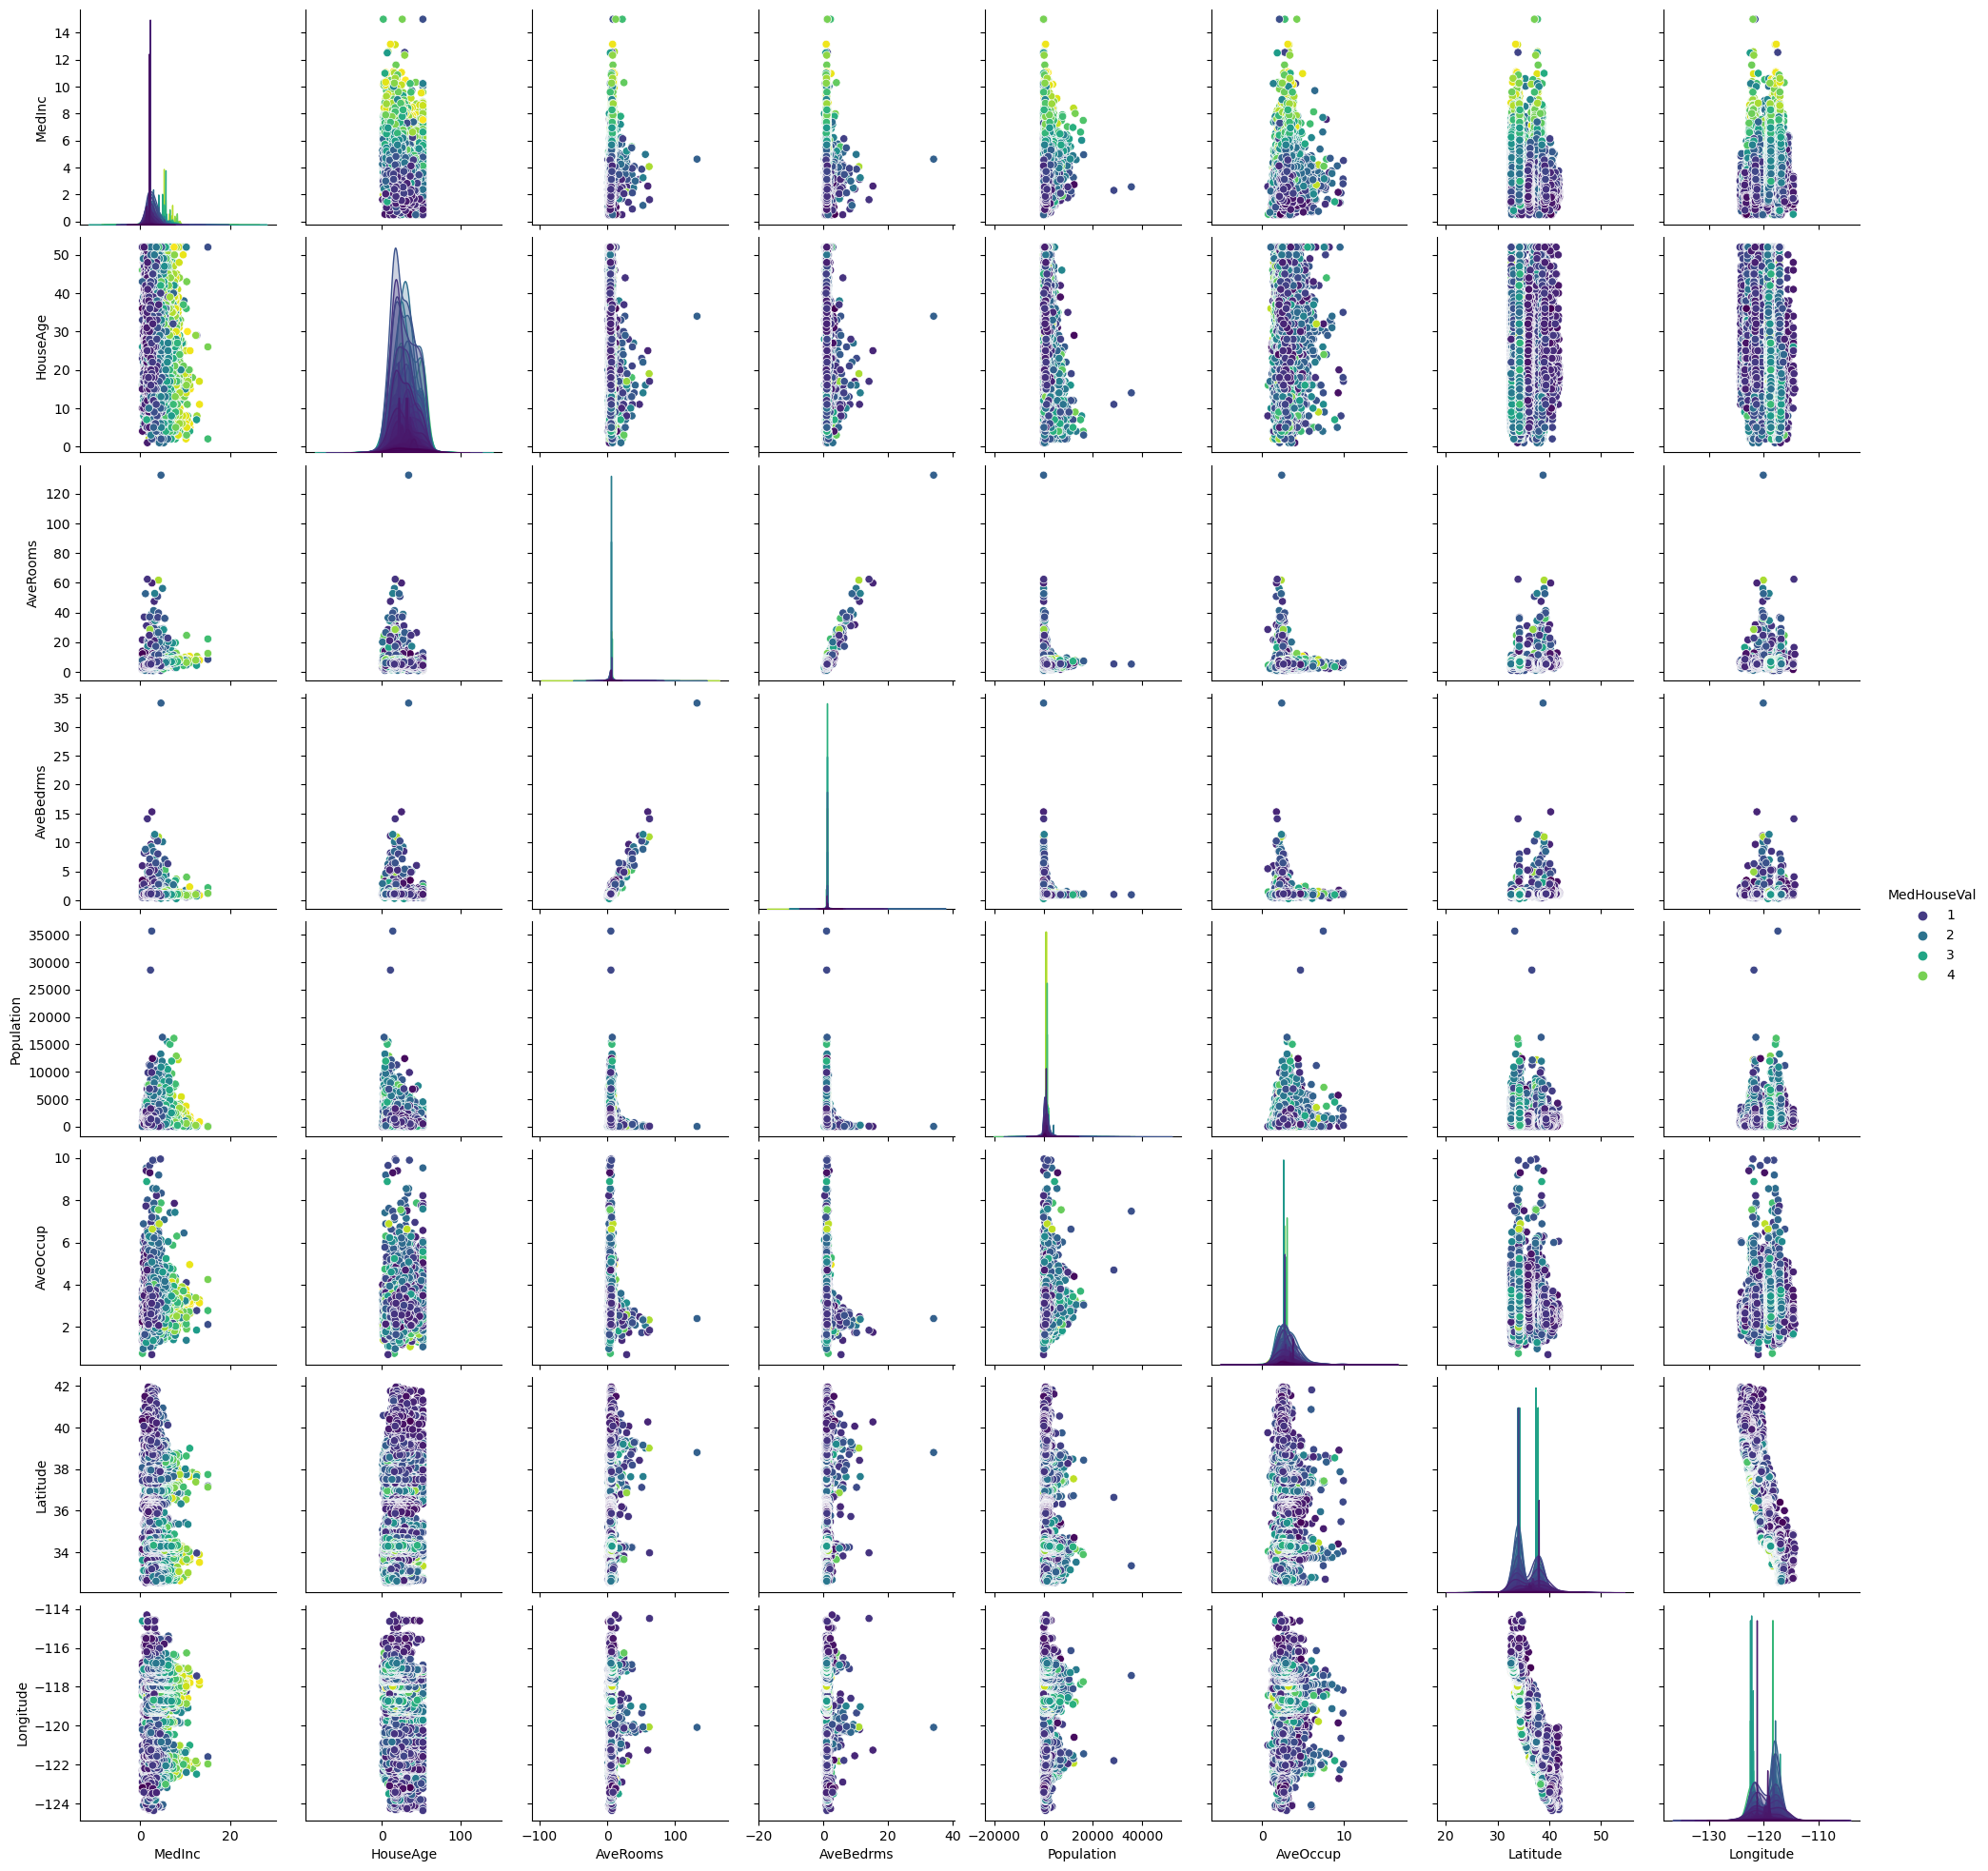

In [15]:
import pandas as pd
sns.pairplot(data=df, hue="MedHouseVal", palette="viridis")
### each diagram is one feature on y-axis vs another feature on x-axis with color code of MedHouseVal at the y-x values
### for y-axis, x-axis of same feature, diagram shows histogram but associated MedHouseVal with x-axis

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


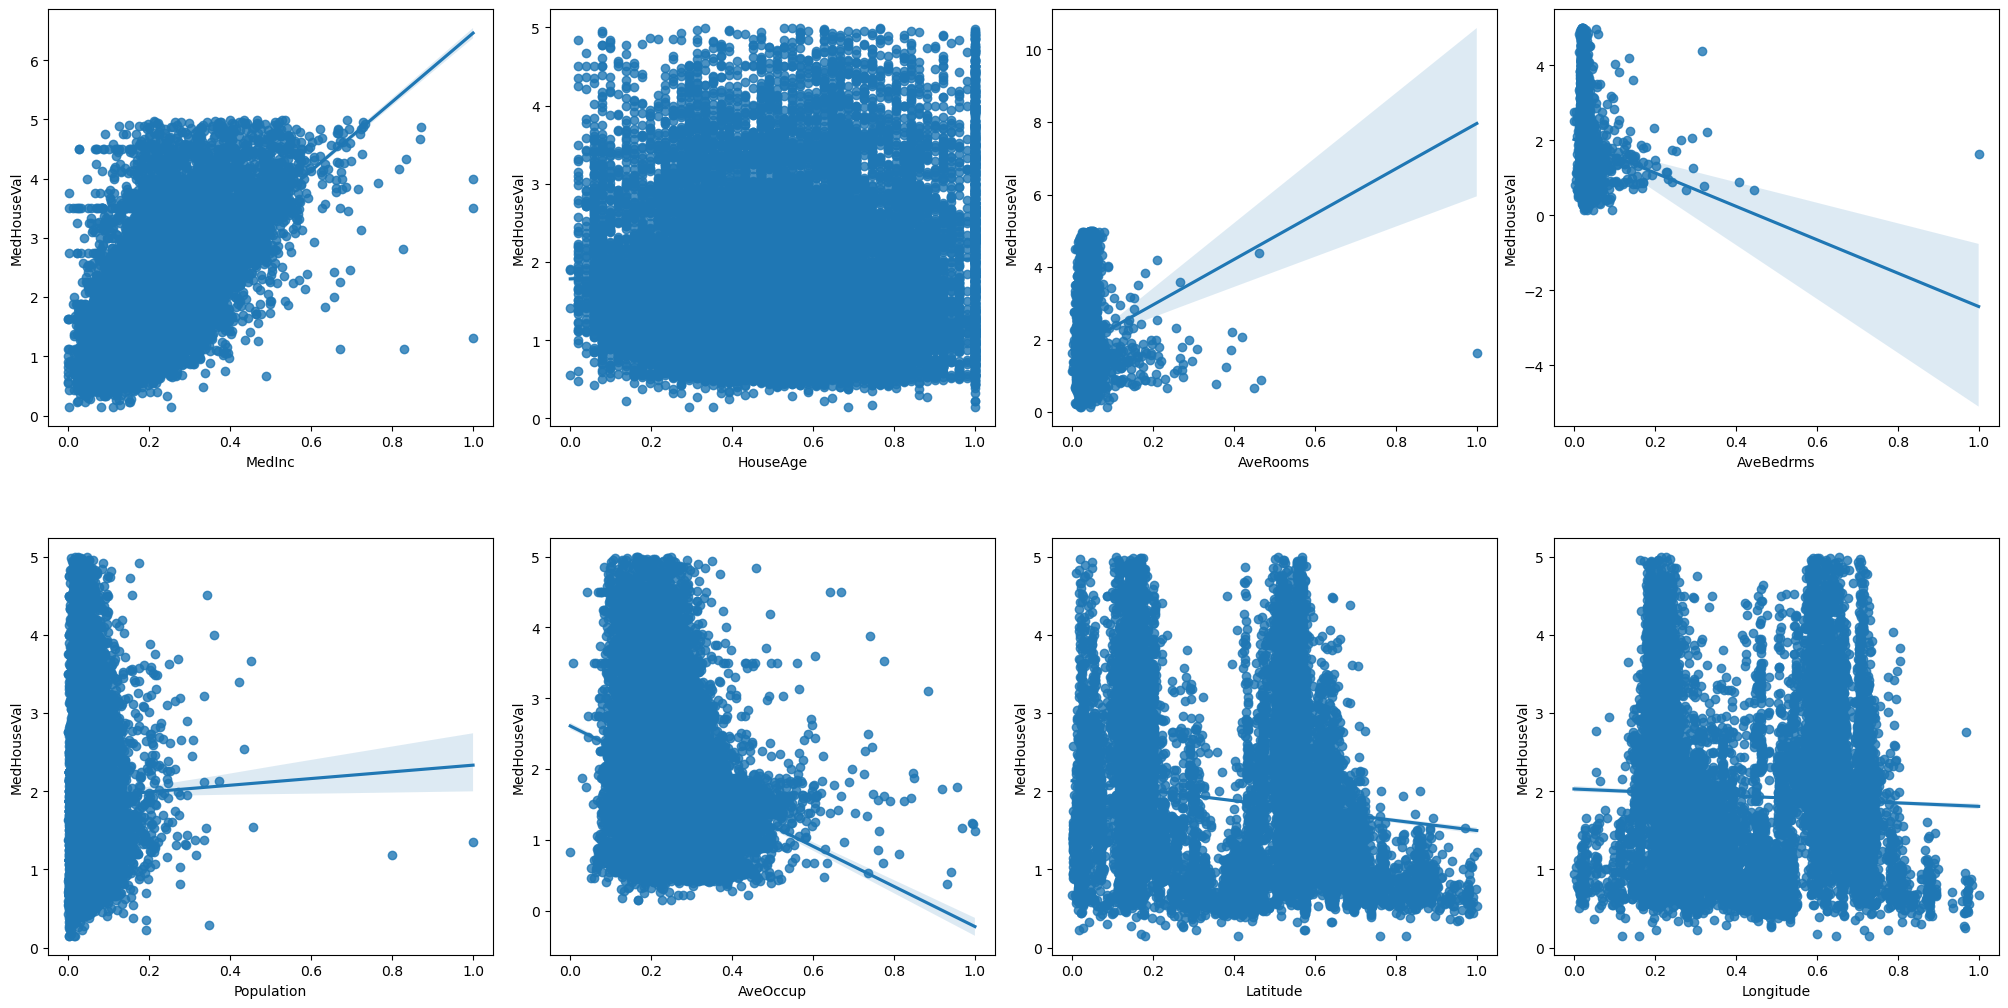

In [17]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MedHouseVal
min_max_scaler = preprocessing.MinMaxScaler()
### x is now transformed via min_max_scaler as (X - X.min) / (X.max - X.min)
column_sels = ['MedInc','HouseAge', 'AveRooms', 'AveBedrms','Population', 'AveOccup', 'Latitude','Longitude'] 
### Note varnames must be in exact small or cap letters
### Features are included in order of their pairwise correlation with MedHouseVal
X = df.loc[:,column_sels]
y = df['MedHouseVal']
X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=X[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
### Note: sns.pairplot(dataset); plt.show() would produce plots of all pairs


In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50) 
### test_size here is 20%; random state number is a seed number -- diff seed produces diff random draws
### note 0.2*19615 = 3923 (or closest to an integer). 0.8*19615 = 15,692.
### X_train, y_train each has 15,692 rows. 
### X_test, y_test each has 3923 rows
### Latter can be checked using print(len(y_test))
print(len(X_train),len(y_train),len(X_test),len(y_test))

15692 15692 3923 3923


# Support Vector Regression

Linear Kernel

In [19]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [20]:
SVR1 = SVR(kernel = 'linear',epsilon=0.56,C=25)
SVR1.fit(X_train, y_train)
y_pred_SVR1_train = SVR1.predict(X_train)
y_pred_SVR1_test = SVR1.predict(X_test)

In [21]:
r2_score_SVR1_train = r2_score(y_train, y_pred_SVR1_train)
print('R2_score (train): ', r2_score_SVR1_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set
r2_score_SVR1_test = r2_score(y_test, y_pred_SVR1_test)
print('R2_score (test): ', r2_score_SVR1_test)

R2_score (train):  0.6197316684471249
R2_score (test):  0.6214212369264716


In [22]:
 # R2 is 1 - SSR/SST. When there is a poor fit, and if SSR > SST, then R2 < 0. 

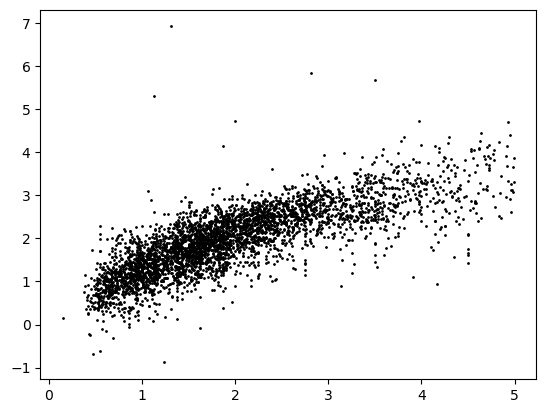

In [23]:
### A scatterplot may be clearer
plt.scatter(y_test, y_pred_SVR1_test,s=1,color='black')
plt.show()

In [24]:
SVR2 = SVR(kernel = 'poly',degree=4,epsilon=0.56,C=25)
SVR2.fit(X_train, y_train)
y_pred_SVR2_train = SVR2.predict(X_train)
y_pred_SVR2_test = SVR2.predict(X_test)

In [25]:
r2_score_SVR2_train = r2_score(y_train, y_pred_SVR2_train)
print('R2_score (train): ', r2_score_SVR2_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set
r2_score_SVR2_test = r2_score(y_test, y_pred_SVR2_test)
print('R2_score (test): ', r2_score_SVR2_test)

R2_score (train):  0.67051837390062
R2_score (test):  0.6332422305099601


In [26]:
SVR3 = SVR(kernel = 'rbf',epsilon=0.56,C=25)
SVR3.fit(X_train, y_train)
y_pred_SVR3_train = SVR3.predict(X_train)
y_pred_SVR3_test = SVR3.predict(X_test)

In [27]:
r2_score_SVR3_train = r2_score(y_train, y_pred_SVR3_train)
print('R2_score (train): ', r2_score_SVR3_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set
r2_score_SVR3_test = r2_score(y_test, y_pred_SVR3_test)
print('R2_score (test): ', r2_score_SVR3_test)

R2_score (train):  0.728628492867319
R2_score (test):  0.7356554348857713


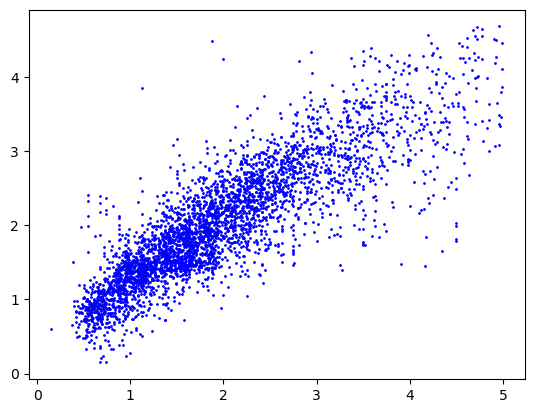

In [28]:
### A scatterplot may be clearer
plt.scatter(y_test, y_pred_SVR3_test,s=1,color='blue')
plt.show()

In [29]:
# Y-axis is predicted target in test set. X-axis is actual target value in test set.